# Лабораторная работа 5.

# Цветовые модели. Цветовая сегментация


В этой работе рассматриваются базовые цветовые модели, методы конвертации, цветовая сегментация.

Цель лабораторной работы: научиться применять методы конвертации цветовых моделей и выполнить  цветовую сегментацию выданного изображения.


In [90]:
%reset

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

Загружаем изображение. Преобразуем в модель RGB

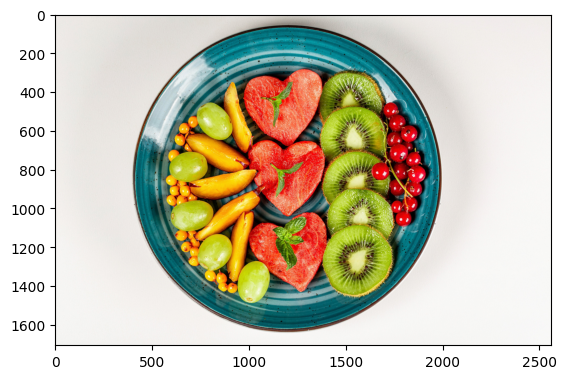

In [92]:
image = cv.imread('./fruit.png')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

Преобразуем изображение в цветовую модель HSV, создадим 3D-визуализацию цветового пространства 

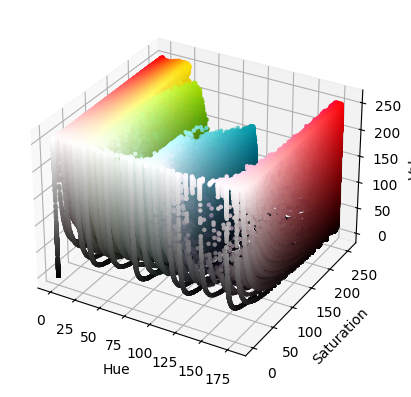

In [93]:
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)
h, s, v = cv.split(image_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = image_rgb.reshape((np.shape(image_rgb)[0]*np.shape(image_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

Создадим и применим маску нужного нам оттенка красного к изображению

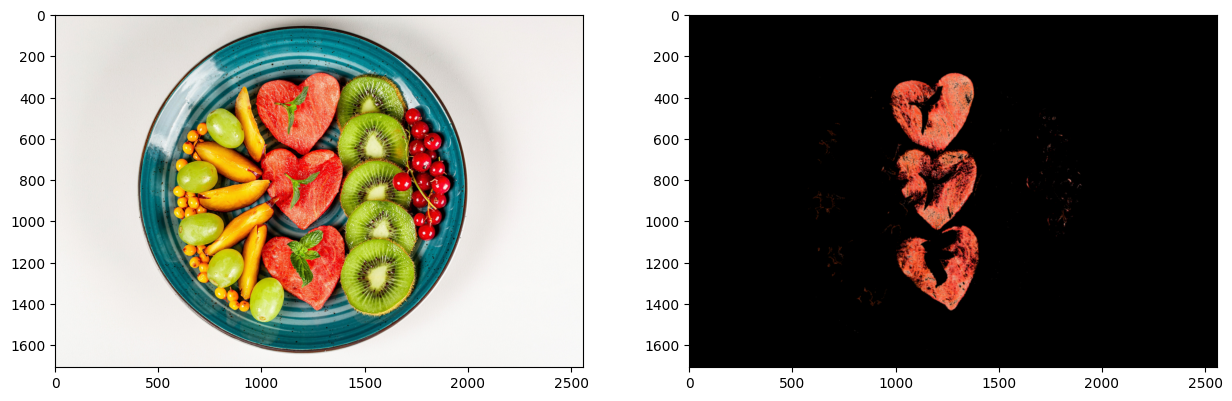

In [94]:
# [hue, saturation, value]

lower_watermelon = np.array([0, 50, 200])    
upper_watermelon = np.array([10, 240, 255])

mask = cv.inRange(image_hsv, lower_watermelon, upper_watermelon)
bitwise = cv.bitwise_and(image_rgb, image_rgb, mask=mask)

result = cv.GaussianBlur(bitwise, (7, 7), 0)
plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [95]:
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(cv.cvtColor(result, cv.COLOR_RGB2GRAY), 8, cv.CV_32S)

print(f"Number of connected components: {num_labels}")

Number of connected components: 212


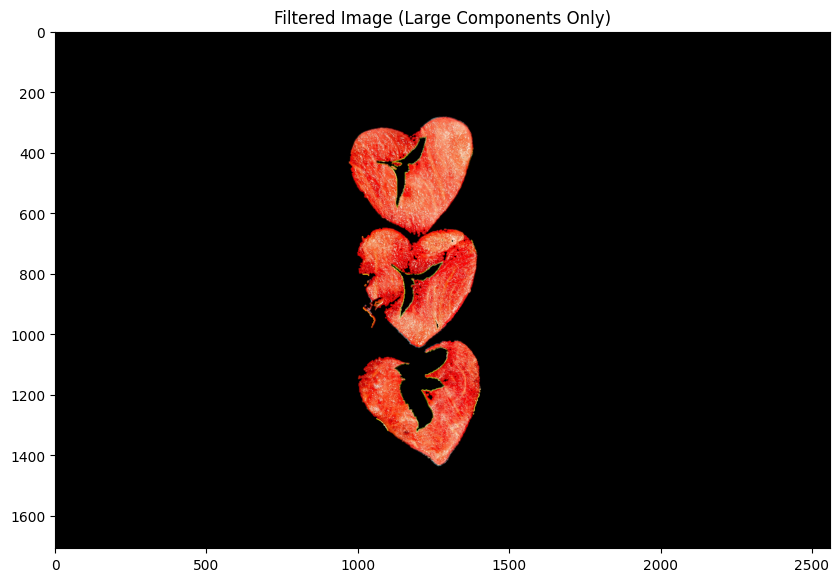

In [96]:
# Define a minimum area threshold
min_area = 3700 # You can adjust this value

# Create a new image to store the filtered components
filtered_mask = np.zeros_like(labels, dtype=np.uint8)

# Iterate through each component (excluding the background)
for i in range(1, num_labels):
    # Get the area of the current component
    area = stats[i, cv.CC_STAT_AREA]
    # If the area is greater than the minimum threshold, add it to the filtered mask
    if area > min_area:
        filtered_mask[labels == i] = 255
        #print(area)

# Apply the filtered mask to the original image
filtered_image = cv.bitwise_and(image_rgb, image_rgb, mask=filtered_mask)

# Display the filtered image
plt.figure(figsize=(10, 10))
plt.imshow(filtered_image)
plt.title("Filtered Image (Large Components Only)")
plt.show()

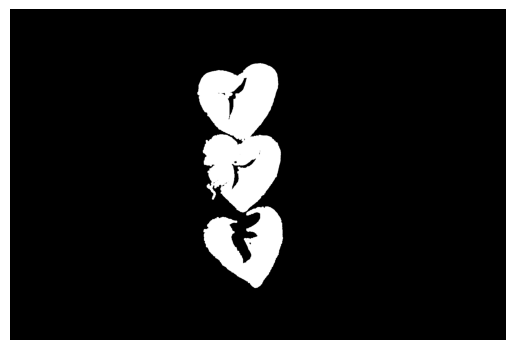

(<matplotlib.image.AxesImage at 0x22e345eee90>,
 (np.float64(-0.5), np.float64(2559.5), np.float64(1706.5), np.float64(-0.5)),
 None)

In [97]:
k = np.ones((5, 5), np.uint8)
out = cv.dilate(filtered_mask, k,6)
plt.imshow(out, cmap='gray'), plt.axis('off'), plt.show()

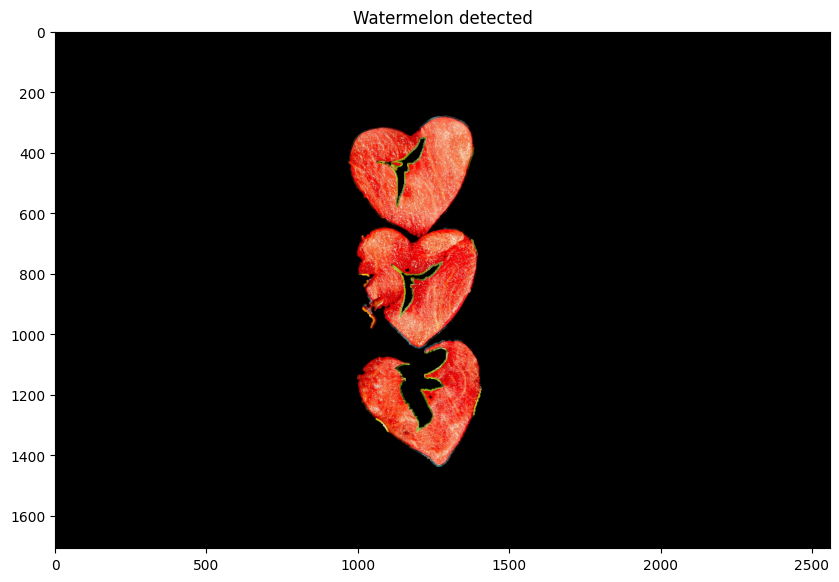

In [99]:
filtered_image = cv.bitwise_and(image_rgb, image_rgb, mask=out)

# Display the filtered image
plt.figure(figsize=(10, 10))
plt.imshow(filtered_image)
plt.title("Watermelon detected")
plt.show()